# Linear Regression
下面，我们使用一个自定义的数据，来使用torch实现一个简单的线性回归

假设我们的模型基础就是y = wx+b，其中w和b均为参数，我们使用y = 3x+0.8来构造数据x，y，所以左后通过模型应该能够得出w和b应该分别接近3和0.8

1.准备数据\
2.计算预测值\
3.计算损失，把参数的梯度置为0，进行反向传播\
4.更新参数

In [97]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [98]:
learning_rate = 0.1

# 1.准备数据
# y = 3x+0.8，准备参数
x = torch.rand([500,1])
y_ture = 3*x + 0.8


In [99]:
# 2.通过模型计算y_perdict
w = torch.rand([1,1],requires_grad=True)
b = torch.tensor(0,requires_grad=True,dtype=torch.float32)

In [100]:
# 4.通过循环，返回传播，更新参数
for i in range(5000):
    # 3.计算loss
    y_predict = torch.matmul(x,w) + b
    loss = (y_ture - y_predict).pow(2).mean()

    if w.grad is not None:
        w.grad.data.zero_()
    if b.grad is not None:
        b.grad.data.zero_()

    loss.backward()  #反向传播
    w.data = w.data - learning_rate * w.grad
    b.data = b.data - learning_rate * b.grad

    print("w,b,loss",w.item(),b.item(),loss.item())


w,b,loss 0.555267333984375 0.42719754576683044 5.165771484375
w,b,loss 0.752241313457489 0.7436279058456421 2.9975733757019043
w,b,loss 0.9050107002258301 0.9772845506668091 1.7828009128570557
w,b,loss 1.0246591567993164 1.1490956544876099 1.101014256477356
w,b,loss 1.1194744110107422 1.2747070789337158 0.717210590839386
w,b,loss 1.1956534385681152 1.3658156394958496 0.5000337362289429
w,b,loss 1.2578301429748535 1.4311656951904297 0.3760610520839691
w,b,loss 1.3094698190689087 1.4772943258285522 0.30425170063972473
w,b,loss 1.3531641960144043 1.5090882778167725 0.2616643011569977
w,b,loss 1.3908517360687256 1.530200481414795 0.23547416925430298
w,b,loss 1.4239826202392578 1.5433616638183594 0.21851137280464172
w,b,loss 1.4536418914794922 1.5506128072738647 0.20676665008068085
w,b,loss 1.4806416034698486 1.5534793138504028 0.19799751043319702
w,b,loss 1.5055896043777466 1.5531013011932373 0.19094900786876678
w,b,loss 1.5289413928985596 1.550330638885498 0.1849181205034256
w,b,loss 1.55

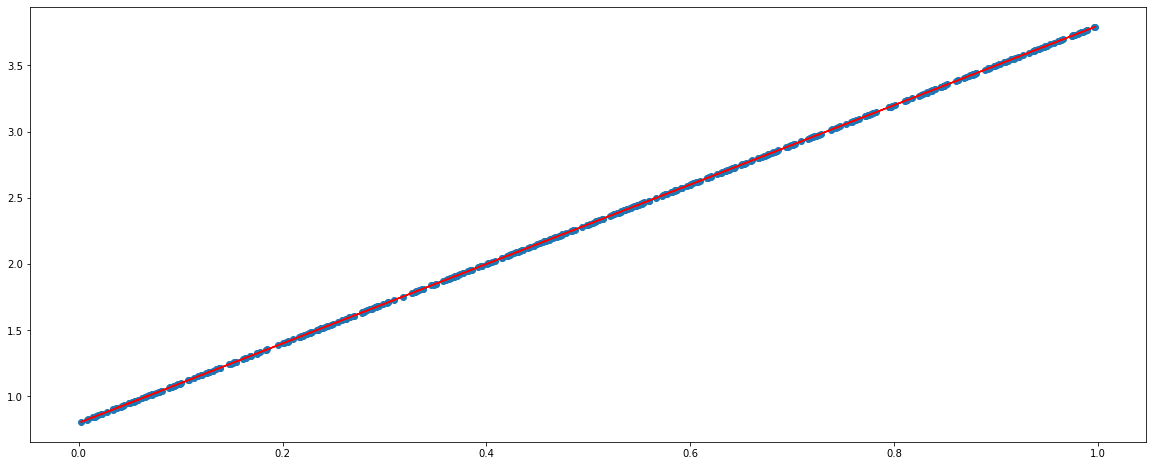

In [101]:
plt.figure(figsize=(20,8))
plt.scatter(x.numpy().reshape(-1),y_ture.numpy().reshape(-1))
plt.plot(x.numpy().reshape(-1),y_predict.detach().numpy().reshape(-1),c="r")
plt.show()

In [102]:
print("w",w)
print("b",b)

w tensor([[3.0000]], requires_grad=True)
b tensor(0.8000, requires_grad=True)


# Pytorch完成模型常用API
在前一部分，我们自己实现了通过torch的相关方法完成反向传播和参数更新，在pytorch中预设了一些更加灵活简单的对象，让我们来构造模型、定义损失，优化损失等

那么接下来，我们一起来了解一下其中常用的API
## nn.Module
nn.Modul 是torch.nn提供的一个类，是pytorch中我们自定义网络的一个基类，在这个类中定义了很多有用的方法，让我们在继承这个类定义网络的时候非常简单

当我们自定义网络的时候，有两个方法需要特别注意：

__init__需要调用super方法，继承父类的属性和方法\
farward方法必须实现，用来定义我们的网络的向前计算的过程\
用前面的y = wx+b的模型举例如下： 
```python
from torch import nn
class Lr(nn.Module):
    def __init__(self):
        super(Lr, self).__init__()  #继承父类init的参数
        self.linear = nn.Linear(1, 1) 

    def forward(self, x):
        out = self.linear(x)
        return out
```
注意：

1.nn.Linear为torch预定义好的线性模型，也被称为全链接层，传入的参数为输入的数量，输出的数量(in_features, out_features),是不算(batch_size的列数)

2.nn.Module定义了__call__方法，实现的就是调用forward方法，即Lr的实例，能够直接被传入参数调用，实际上调用的是forward方法并传入参数

```python
# 实例化模型
model = Lr()
# 传入数据，计算结果
predict = model(x)
```
## 优化器类
优化器(optimizer)，可以理解为torch为我们封装的用来进行更新参数的方法，比如常见的随机梯度下降(stochastic gradient descent,SGD)

优化器类都是由torch.optim提供的，例如

1.torch.optim.SGD(参数，学习率)\
2.torch.optim.Adam(参数，学习率)

注意：

1.参数可以使用model.parameters()来获取，获取模型中所有requires_grad=True的参数\
2.优化类的使用方法:
    1).实例化;
    2).所有参数的梯度，将其值置为0;
    3).反向传播计算梯度;
    4).更新参数值.

示例如下：
```python
optimizer = optim.SGD(model.parameters(), lr=1e-3) #1. 实例化
optimizer.zero_grad() #2. 梯度置为0
loss.backward() #3. 计算梯度
optimizer.step()  #4. 更新参数的值
```
## 损失函数
前面的例子是一个回归问题，torch中也预测了很多损失函数

1.均方误差:nn.MSELoss(),常用于回归问题
2.交叉熵损失：nn.CrossEntropyLoss()，常用于分类问题

使用方法：

```python
model = Lr() #1. 实例化模型
criterion = nn.MSELoss() #2. 实例化损失函数
optimizer = optim.SGD(model.parameters(), lr=1e-3) #3. 实例化优化器类
for i in range(100):
    y_predict = model(x_true) #4. 向前计算预测值
    loss = criterion(y_true,y_predict) #5. 调用损失函数传入真实值和预测值，得到损失结果
    optimizer.zero_grad() #5. 当前循环参数梯度置为0
    loss.backward() #6. 计算梯度
    optimizer.step()  #7. 更新参数的值

## 把线性回归完整代码

In [103]:
import torch
from torch import nn
from torch import optim
import numpy as np
from matplotlib import pyplot as plt

In [104]:

# 1. 定义数据
x = torch.rand([50,1])
y = x*3 + 0.8

In [105]:

#2 .定义模型
class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        self.linear = nn.Linear(1,1)
		
    def forward(self, x):
        out = self.linear(x)
        return out

In [106]:

# 2. 实例化模型，loss，和优化器
model = Lr()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)


In [107]:
#3. 训练模型
for i in range(30000):
    out = model(x) #3.1 获取预测值
    loss = criterion(y,out) #3.2 计算损失
    optimizer.zero_grad()  #3.3 梯度归零
    loss.backward() #3.4 计算梯度
    optimizer.step()  # 3.5 更新梯度
    if (i+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(i,30000,loss.data))

Epoch[19/30000], loss: 5.597931
Epoch[39/30000], loss: 5.082218
Epoch[59/30000], loss: 4.615932
Epoch[79/30000], loss: 4.194327
Epoch[99/30000], loss: 3.813112
Epoch[119/30000], loss: 3.468410
Epoch[139/30000], loss: 3.156713
Epoch[159/30000], loss: 2.874852
Epoch[179/30000], loss: 2.619964
Epoch[199/30000], loss: 2.389458
Epoch[219/30000], loss: 2.180993
Epoch[239/30000], loss: 1.992453
Epoch[259/30000], loss: 1.821924
Epoch[279/30000], loss: 1.667678
Epoch[299/30000], loss: 1.528152
Epoch[319/30000], loss: 1.401931
Epoch[339/30000], loss: 1.287740
Epoch[359/30000], loss: 1.184422
Epoch[379/30000], loss: 1.090935
Epoch[399/30000], loss: 1.006333
Epoch[419/30000], loss: 0.929766
Epoch[439/30000], loss: 0.860461
Epoch[459/30000], loss: 0.797721
Epoch[479/30000], loss: 0.740916
Epoch[499/30000], loss: 0.689478
Epoch[519/30000], loss: 0.642890
Epoch[539/30000], loss: 0.600688
Epoch[559/30000], loss: 0.562451
Epoch[579/30000], loss: 0.527798
Epoch[599/30000], loss: 0.496385
Epoch[619/30000

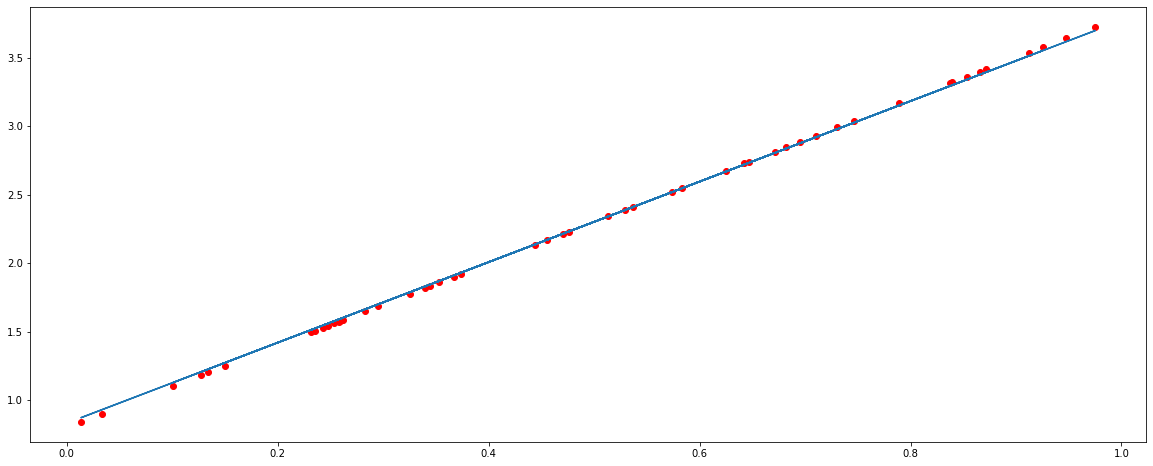

In [108]:

#4. 模型评估
model.eval() #设置模型为评估模式，即预测模式
predict = model(x)
predict = predict.data.numpy()
plt.figure(figsize=(20,8))
plt.scatter(x.data.numpy(),y.data.numpy(),c="r")
plt.plot(x.data.numpy(),predict)
plt.show()

# 在GPU上运行代码
当模型太大，或者参数太多的情况下，为了加快训练速度，经常会使用GPU来进行训练

此时我们的代码需要稍作调整：

1.判断GPU是否可用torch.cuda.is_available()

```python
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
>>device(type='cuda', index=0)  #使用gpu
>>device(type='cpu') #使用cpu
```
2.把模型参数和input数据转化为cuda的支持类型
```python
model.to(device)
x_true.to(device)
```
3.在GPU上计算结果也为cuda的数据类型，需要转化为numpy或者torch的cpu的tensor类型
```python
predict = predict.cpu().detach().numpy() 
```
detach()的效果和data的相似，但是detach()是深拷贝，data是取值，是浅拷贝

修改之后的代码如下：

In [109]:
import torch
from torch import nn
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import time

In [121]:
# 1. 定义数据
x = torch.rand([50,1])
y = x*8 + 0.4
y += torch.tensor(np.random.normal(0, 0.01, size=y.size()),
                       dtype=torch.float32)

In [122]:

#2 .定义模型
class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        out = self.linear(x)
        return out

In [123]:

# 2. 实例化模型，loss，和优化器

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
x,y = x.to(device),y.to(device)

model = Lr().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [124]:
#3. 训练模型
for i in range(30000):
    out = model(x)
    loss = criterion(y,out)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(i,30000,loss.data))

Epoch[19/30000], loss: 19.018475
Epoch[39/30000], loss: 17.488876
Epoch[59/30000], loss: 16.100325
Epoch[79/30000], loss: 14.839706
Epoch[99/30000], loss: 13.695129
Epoch[119/30000], loss: 12.655805
Epoch[139/30000], loss: 11.711951
Epoch[159/30000], loss: 10.854693
Epoch[179/30000], loss: 10.075980
Epoch[199/30000], loss: 9.368519
Epoch[219/30000], loss: 8.725683
Epoch[239/30000], loss: 8.141468
Epoch[259/30000], loss: 7.610429
Epoch[279/30000], loss: 7.127625
Epoch[299/30000], loss: 6.688575
Epoch[319/30000], loss: 6.289215
Epoch[339/30000], loss: 5.925860
Epoch[359/30000], loss: 5.595168
Epoch[379/30000], loss: 5.294104
Epoch[399/30000], loss: 5.019920
Epoch[419/30000], loss: 4.770124
Epoch[439/30000], loss: 4.542448
Epoch[459/30000], loss: 4.334843
Epoch[479/30000], loss: 4.145449
Epoch[499/30000], loss: 3.972575
Epoch[519/30000], loss: 3.814692
Epoch[539/30000], loss: 3.670411
Epoch[559/30000], loss: 3.538471
Epoch[579/30000], loss: 3.417732
Epoch[599/30000], loss: 3.307154
Epoch[

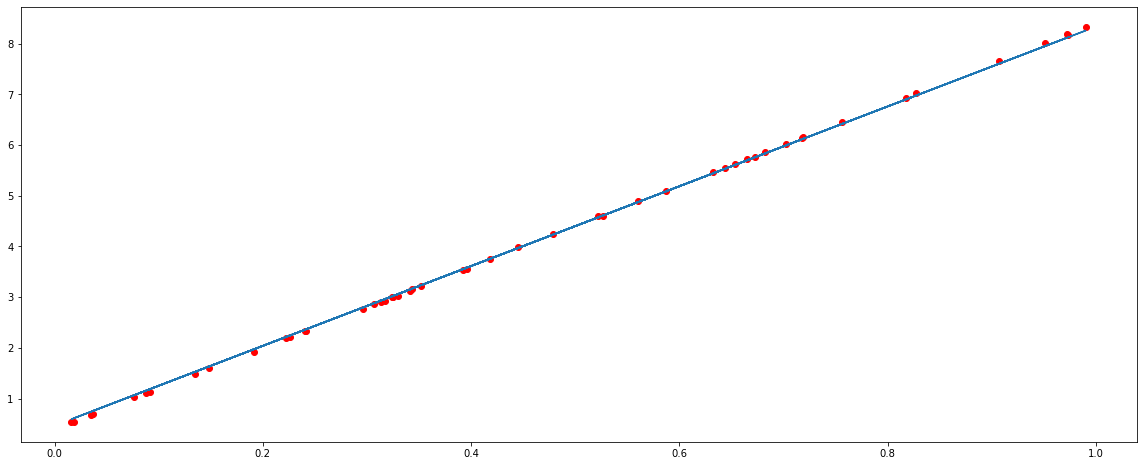

In [125]:

#4. 模型评估
model.eval() #
predict = model(x)
predict = predict.cpu().detach().numpy() #转化为numpy数组
plt.figure(figsize=(20,8))
plt.scatter(x.cpu().data.numpy(),y.cpu().data.numpy(),c="r")
plt.plot(x.cpu().data.numpy(),predict,)
plt.show()